In [1]:
import sys,os
import numpy as np
import pandas as pd
import random

sys.path.append('../')

from unpast.utils.method import prepare_input_matrix
from unpast.utils.io import read_bic_table, write_bic_table
from unpast.utils.consensus import make_consensus_biclusters
from unpast.run_unpast import unpast

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
analysis_seed = 0
n_runs = 5
seeds = []
random.seed(analysis_seed)
for i in range(n_runs):
    seeds.append(random.randint(0,1000000))

print("generate ",n_runs," seeds",seeds)

generate  5  seeds [885440, 403958, 794772, 933488, 441001]


In [3]:
passed_ids = pd.read_csv("../../data/preprocessed_v6/passed_gene_ids.txt",header=None)
passed_ids = passed_ids[0].values
passed_ids = [ x for x in sorted(set(passed_ids)) if not x =='pk' ]
bic_dir = "../../all_cancers_results_latest/"
suffix = ".bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv"

exprs_dir = "../../data/PanCan/"
len(passed_ids)

26296

In [ ]:
for f in sorted(os.listdir(exprs_dir)):
    if f.endswith(".exprs.tsv.gz") and f.replace(".exprs.tsv.gz",""): # 
        cancer = f.replace(".exprs.tsv.gz","")
        
        exprs_file = cancer+".exprs.tsv.gz"
        exprs = pd.read_csv(exprs_dir+"/"+exprs_file,sep = "\t",index_col=0)

        exprs = exprs.loc[passed_ids,:]
        exprs.to_csv(exprs_dir+"/no_pseudo/"+cancer+"_26K.exprs.tsv.gz", sep = "\t")
        basename = cancer
        exprs_file  = exprs_dir+"/no_pseudo/"+cancer+"_26K.exprs.tsv.gz"
        
        print(cancer, exprs_file, exprs.shape)
        for seed in seeds:
            results = unpast(exprs_file, basename,
                                  rpath="/home/olya/anaconda3/envs/r4_env/bin/",
                                  out_dir=bic_dir,
                                  load=False,
                                  seed = seed,
                                  verbose = False)

            print("\tn=%s"%results.shape[0])

ACC ACC ../../data/PanCan//no_pseudo/ACC_26K.exprs.tsv.gz (26296, 77)
	n=1420
	n=1434
	n=1480
	n=1377
	n=1414
BLCA BLCA ../../data/PanCan//no_pseudo/BLCA_26K.exprs.tsv.gz (26296, 407)
	n=848
	n=653
	n=688
	n=812
	n=679
BRCA BRCA ../../data/PanCan//no_pseudo/BRCA_26K.exprs.tsv.gz (26296, 1098)
	n=269
	n=267
	n=268
	n=262
	n=266
CESC CESC ../../data/PanCan//no_pseudo/CESC_26K.exprs.tsv.gz (26296, 306)
	n=604
	n=614
	n=768
	n=708
	n=525
CHOL CHOL ../../data/PanCan//no_pseudo/CHOL_26K.exprs.tsv.gz (26296, 36)
	n=839
	n=784
	n=829
	n=938
	n=899
COAD COAD ../../data/PanCan//no_pseudo/COAD_26K.exprs.tsv.gz (26296, 288)
	n=255
	n=254
	n=293
	n=247
	n=245
DLBC DLBC ../../data/PanCan//no_pseudo/DLBC_26K.exprs.tsv.gz (26296, 47)
	n=761
	n=670
	n=684
	n=591
	n=658
ESCA ESCA ../../data/PanCan//no_pseudo/ESCA_26K.exprs.tsv.gz (26296, 182)
	n=410
	n=294
	n=389
	n=439
	n=375
GBM GBM ../../data/PanCan//no_pseudo/GBM_26K.exprs.tsv.gz (26296, 165)
	n=1370
	n=1249
	n=1373
	n=1300
	n=1322
HNSC HNSC ../../d

In [4]:

for f in sorted(os.listdir(exprs_dir)):
    if f.endswith(".exprs.tsv.gz") and f.replace(".exprs.tsv.gz",""): # 
        cancer = f.replace(".exprs.tsv.gz","")
        
        basename = cancer
        exprs_file  = exprs_dir+"/no_pseudo/"+cancer+"_26K.exprs.tsv.gz"
        exprs = pd.read_csv(exprs_file,sep = "\t",index_col=0)
        exprs_z = prepare_input_matrix(exprs, min_n_samples=5,ceiling=3)

        biclusters = []
        for seed in seeds:
            bic_file = bic_dir+cancer+".seed="+str(seed)+suffix
            b = read_bic_table(bic_file)
            b.index = ["seed="+str(seed)+"_"+str(x) for x in b.index.values ]
            biclusters.append(b)
        cb = make_consensus_biclusters(biclusters,
                                       exprs_z,
                                       seed = analysis_seed,
                                       verbose = True,
                                       plot = False
                                      )
        cb.index = [cancer+"_"+str(x) for x in cb.index.values]
        write_bic_table(cb, bic_dir+cancer+"_consensus.seed="+str(analysis_seed)+suffix)
        print(cancer, cb.shape[0], exprs.shape)

1246 s for similarity matrix
	Running Louvain ...
		modularity: newman
	curve type: increasing
	Louvain runtime: modules detected in 19.72 s.
	modules: 1541, not clustered features 2005 
		similarity cutoff: 0.43 modularity: 0.999
keep genes included in at least 2 merged biclusters
all consensus biclusters: 3878
detected 2+ times:1270
33 s for making consensus biclusters from consensus gene sets
ACC 1270 (26296, 77)
363 s for similarity matrix
	Running Louvain ...
		modularity: newman
	curve type: increasing
	Louvain runtime: modules detected in 5.19 s.
	modules: 899, not clustered features 680 
		similarity cutoff: 0.78 modularity: 0.999
keep genes included in at least 2 merged biclusters
all consensus biclusters: 1573
detected 2+ times:872
33 s for making consensus biclusters from consensus gene sets
BLCA 872 (26296, 407)
68 s for similarity matrix
	Running Louvain ...
		modularity: newman
	curve type: increasing
	Louvain runtime: modules detected in 0.53 s.
	modules: 286, not cluste

all consensus biclusters: 2991
detected 2+ times:1326
51 s for making consensus biclusters from consensus gene sets
OV 1326 (26296, 427)
772 s for similarity matrix
	Running Louvain ...
		modularity: newman
	curve type: increasing
	Louvain runtime: modules detected in 10.13 s.
	modules: 1472, not clustered features 1080 
		similarity cutoff: 0.53 modularity: 0.999
keep genes included in at least 2 merged biclusters
all consensus biclusters: 3024
detected 2+ times:1084
32 s for making consensus biclusters from consensus gene sets
PAAD 1084 (26296, 179)
747 s for similarity matrix
	Running Louvain ...
		modularity: newman
	curve type: increasing
	Louvain runtime: modules detected in 10.83 s.
	modules: 1377, not clustered features 1172 
		similarity cutoff: 0.58 modularity: 0.999
keep genes included in at least 2 merged biclusters
all consensus biclusters: 2798
detected 2+ times:1127
34 s for making consensus biclusters from consensus gene sets
PCPG 1127 (26296, 182)
64 s for similarity m

In [4]:
stats = {}
bics = {}
for f in sorted(os.listdir(exprs_dir)):
    if f.endswith(".exprs.tsv.gz"): # 
        cancer = f.replace(".exprs.tsv.gz","")
        exprs_file  = exprs_dir+"/no_pseudo/"+cancer+"_26K.exprs.tsv.gz"
        exprs = pd.read_csv(exprs_file,sep = "\t",index_col=0)
        b = read_bic_table(bic_dir+cancer+"_consensus.seed="+str(analysis_seed)+suffix)
        b["cancer"] = cancer
        bics[cancer] = b
        #print(cancer, exprs.shape[1],b.shape[0])
        stats[cancer] = {"n_samples":exprs.shape[1],
                         "n_biclusters":b.shape[0]}
stats = pd.DataFrame.from_dict(stats).T

In [5]:
# https://cancerci.biomedcentral.com/articles/10.1186/s12935-020-01678-x/figures/2
ecto = ["BRCA","HNSC","GBM","LGG","SKCM","PCPG","UVM"]
meso=["OV","PRAD","LAML","DLBC","UCS","UCEC",
      "KICH","KIRC","KIRP","MESO","TGCT","SARC",
     "CESC","ACC"]
# TGCT 	= Testicular Germ Cell Tumors
# ? ESCA -? Esophageal carcinoma
ento=["READ","COAD","LUAD","LUSC","THYM","THCA","STAD",
      "PAAD","LIHC","BLCA","CHOL",]

stats["germ_layer"] = ""
stats.loc[ecto,"germ_layer"] = "ecto"
stats.loc[meso,"germ_layer"] = "meso"
stats.loc[ento,"germ_layer"] = "ento"
stats

,n_samples,n_biclusters,germ_layer
ACC,77,1270,meso
BLCA,407,872,ento
BRCA,1098,285,ecto
CESC,306,484,meso
CHOL,36,504,ento
COAD,288,275,ento
DLBC,47,472,meso
ESCA,182,400,
GBM,165,1289,ecto
HNSC,520,495,ecto


<Figure size 500x500 with 0 Axes>

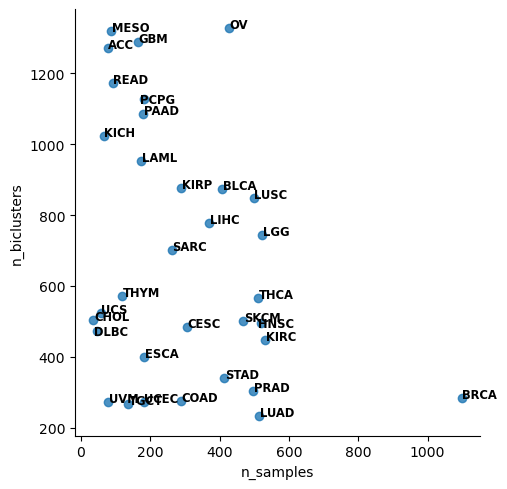

In [6]:
plt.figure(figsize=(5,5))

stats["cancer"]=stats.index
sns.lmplot(data=stats, 
           x="n_samples",
           y="n_biclusters",
           fit_reg=False)#, hue='germ_layer')

for line in range(0,stats.shape[0]):
    if stats.index[line] not in ["PCPG","DLBC","HNSC","TGCT"]:
        plt.text(stats.n_samples[line]+2, stats.n_biclusters[line],
                     stats.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')
    else:
        plt.text(stats.n_samples[line]-10, stats.n_biclusters[line]-20,
                     stats.index[line], horizontalalignment='left', size='small', color='black', weight='semibold')

plt.xlabel("number of samples in a dataset")
plt.ylabel("number of biclusters")
plt.show()